In [1]:
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.spatial.distance import squareform, pdist, cdist
from itertools import combinations, product

import time
import graco
import random
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set()

pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

DATA_DIRECTORY = "/media/clusterduck123/joe/data/"
RAW_DATA_DIRECTORY = f"{DATA_DIRECTORY}/raw-data"
YEAST_DIRECTORY = f"{DATA_DIRECTORY}/processed-data/yeast"
NETWORK_DIRECTORY = f"{YEAST_DIRECTORY}/networks"
MATRIX_DIRECTORY  = f"{YEAST_DIRECTORY}/distance-matrices"

# Here we GO

In [3]:
DEG_FILENAME = "degannotation-e.dat"
DEG_FILEPATH = f"{RAW_DATA_DIRECTORY}/{DEG_FILENAME}"

# load DEG dat-file as dataframe and extract yeast data (DEG2001)
DEG_df = pd.read_csv(f"{DEG_FILEPATH}", delimiter='\t', encoding='latin1').loc['DEG2001'].reset_index()

# load PPI with official symbol gene names
PPI_nx = nx.read_edgelist(f"{NETWORK_DIRECTORY}/PPI_BioGRID_official.txt")

In [4]:
e_genes = set(DEG_df.level_1) & set(PPI_nx)
n_genes = set(PPI_nx) - e_genes

assert len(PPI_nx) == len(e_genes) + len(n_genes)

In [5]:
GDV = graco.orbits(PPI_nx)
GCV = graco.coefficients(PPI_nx)

# Orbit analysis

In [6]:
fig, axes = plt.subplots(3,5,figsize=(16,8))
for nr,orbit in enumerate(map(str,range(15))):
    
    e_heights, e_edges = np.histogram(GDV[orbit][e_genes    ], 
                                      bins = np.logspace(np.log10(1),np.log10(max(GDV[orbit][e_genes    ])), 50))
    heights  ,   edges = np.histogram(GDV[orbit][set(PPI_nx)], 
                                      bins = np.logspace(np.log10(1),np.log10(max(GDV[orbit][set(PPI_nx)])), 50))
    
    axes.item(nr).bar(e_edges[:-1], e_heights, alpha=0.5, label='essential', align="edge", width=np.diff(e_edges))
    axes.item(nr).bar(  edges[:-1],   heights, alpha=0.5, label='all genes', align="edge", width=np.diff(edges))
    
    axes.item(nr).set_title(orbit, fontsize=18)
    axes.item(nr).set_xscale("log")
    axes.item(nr).legend();
plt.tight_layout()
plt.savefig('/home/clusterduck123/Desktop/plots/orbits_overview.png')
plt.savefig('/home/clusterduck123/Desktop/plots/orbits_overview.pdf')

Error in callback <function flush_figures at 0x7ffa549b3488> (for post_execute):


KeyboardInterrupt: 

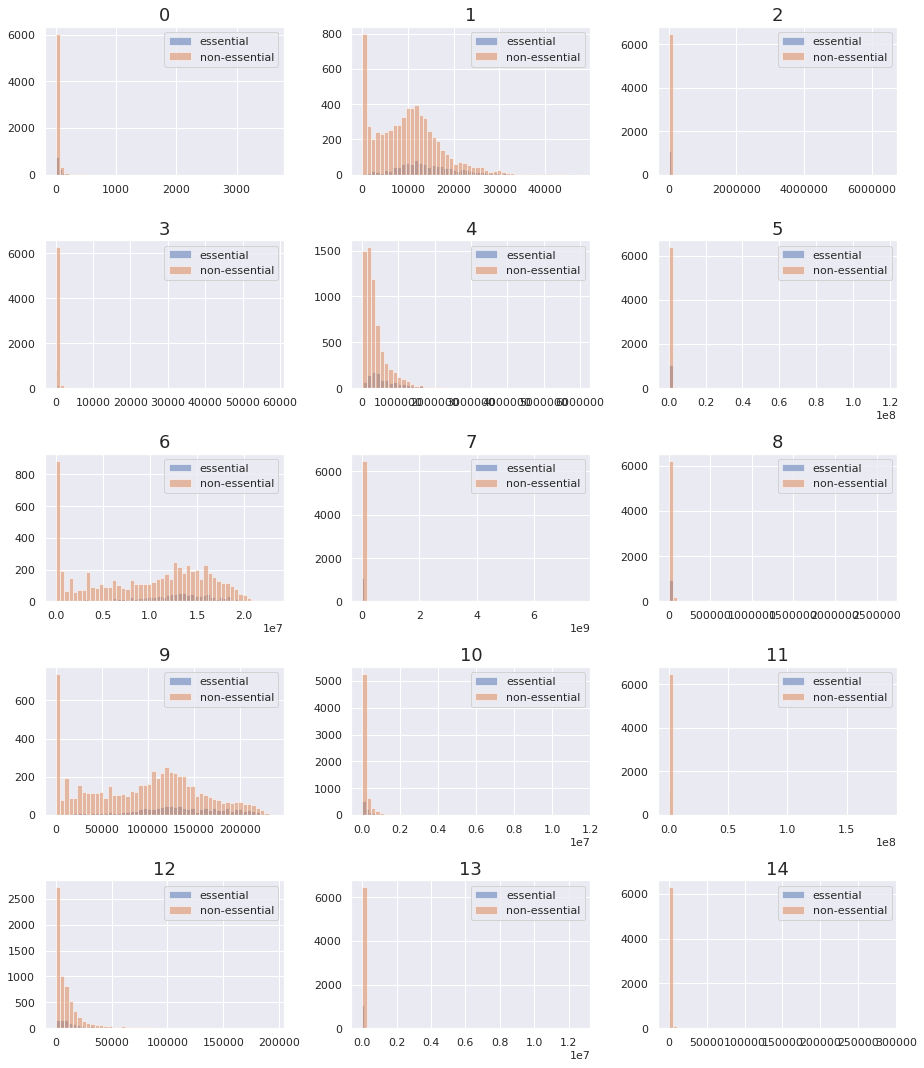

In [8]:
fig, axes = plt.subplots(5,3,figsize=(13,15))
for nr,orbit in enumerate(map(str,range(15))):
    
    bars, pos, sth = axes.item(nr).hist(GDV[orbit][e_genes]    , bins=50, alpha=0.5, label='essential')
    bars, pos, sth = axes.item(nr).hist(GDV[orbit][set(PPI_nx)], bins=50, alpha=0.5, label='non-essential')
    
    axes.item(nr).set_title(orbit, fontsize=18)
    #axes.item(nr).set_xscale("log")
    axes.item(nr).legend();
plt.tight_layout()
plt.savefig('/home/clusterduck123/Desktop/plots/orbits_overview.png')
plt.savefig('/home/clusterduck123/Desktop/plots/orbits_overview.pdf')

## Variance analysis

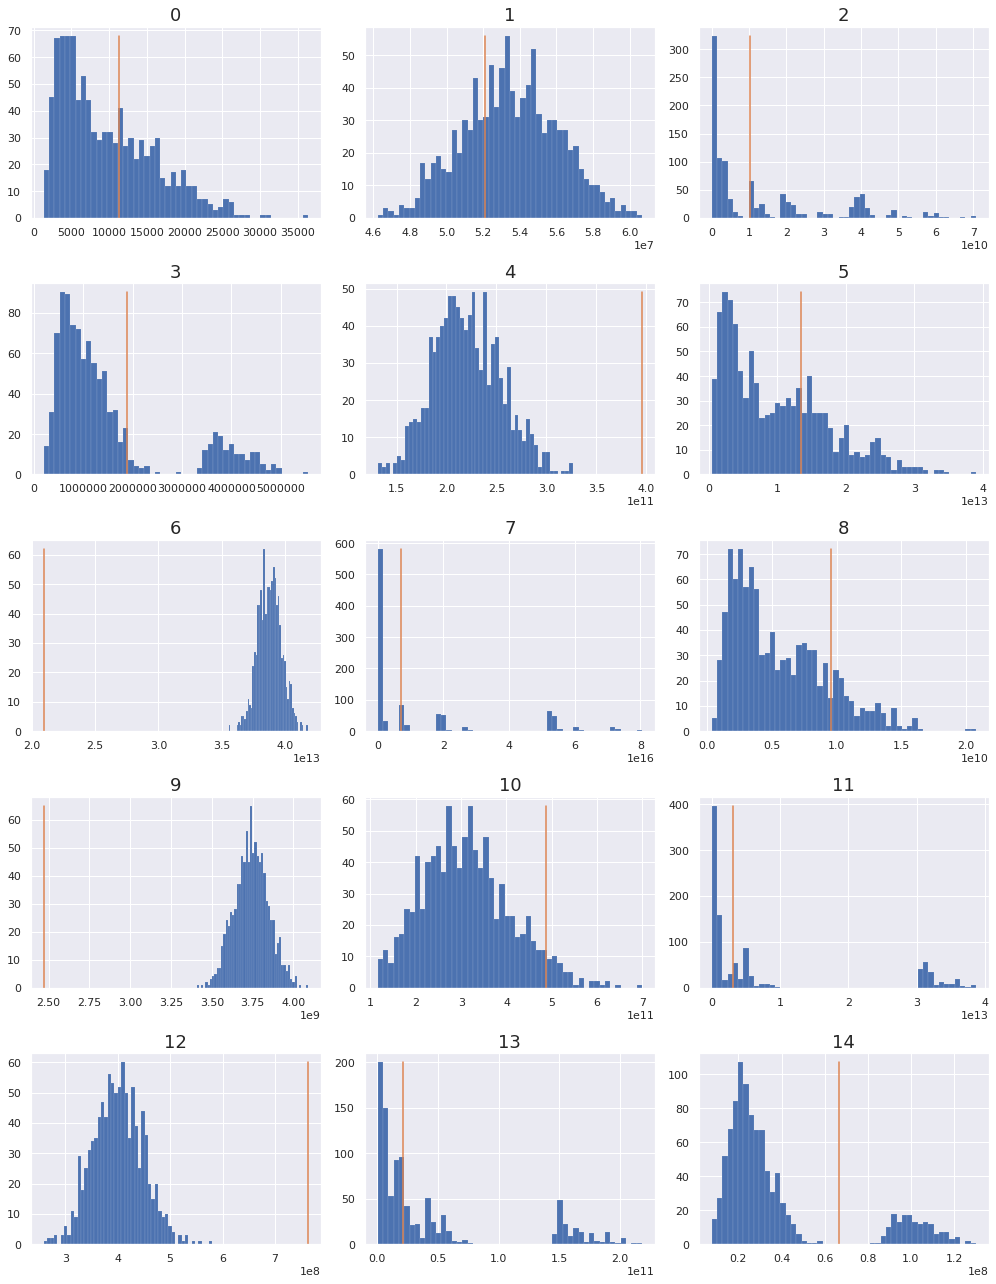

In [20]:
sample_size = 1000
k = len(e_genes)

fig, axes = plt.subplots(5,3,figsize=(14,18))

for nr,orbit in enumerate(map(str,range(15))):
    
    var_list  = []

    for _ in range(sample_size):
        sample_genes = random.sample(PPI_nx.nodes, k)
        var_list.append(GDV.loc[sample_genes,orbit].var())
        
    e_var  = GDV.loc[e_genes,orbit].var()
        
    bars, pos, sth = axes.item(nr).hist(var_list, bins=50, linewidth=0.1)
    axes.item(nr).plot([e_var,e_var], [0,max(bars)]);
    axes.item(nr).set_title(orbit, fontsize=18)
    
plt.tight_layout()
#plt.savefig('/home/clusterduck123/Desktop/plots/orbit_can_1000.pdf')
#plt.savefig('/home/clusterduck123/Desktop/plots/orbit_can_1000.png')

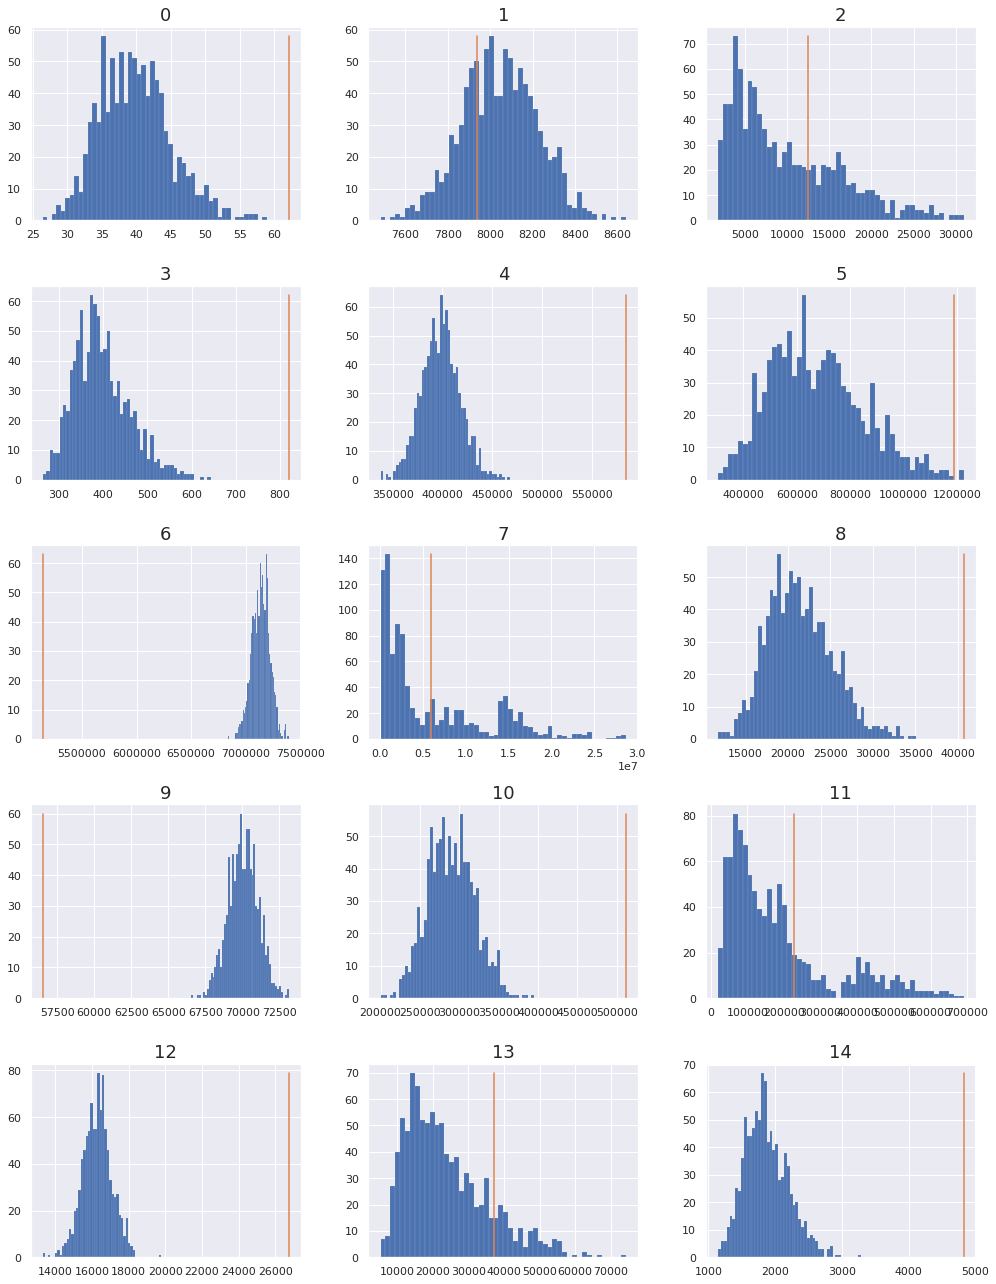

In [15]:
sample_size = 10
k = len(e_genes)

fig, axes = plt.subplots(5,3,figsize=(14,18))

for nr,orbit in enumerate(map(str,range(15))):
    
    D = squareform(pdist(np.array(GDV[orbit]).reshape(-1,1), 'canberra'))
    D = pd.DataFrame(D, columns=PPI_nx.nodes, index=PPI_nx.nodes)
    
    mu_list  = []

    for _ in range(sample_size):
        sample_genes = random.sample(PPI_nx.nodes, k)
        sample_dists = squareform(D.loc[sample_genes,sample_genes])
        mu_list.append( np.mean(sample_dists))
        
    e_dists = squareform(D.loc[e_genes,e_genes])
    e_mu  = np.mean(e_dists)
        
    bars, pos, sth = axes.item(nr).hist(mu_list, bins=50, linewidth=0.1)
    axes.item(nr).plot([e_mu,e_mu], [0,max(bars)]);
    axes.item(nr).set_title(orbit, fontsize=18)
    
plt.tight_layout()
#plt.savefig('/home/clusterduck123/Desktop/plots/orbit_can_1000.pdf')
#plt.savefig('/home/clusterduck123/Desktop/plots/orbit_can_1000.png')

# Coefficient analysis

/home/clusterduck123/Desktop/git/supplements/venv/graco/lib/python3.6/site-packages/pandas/core/series.py:1155: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/home/clusterduck123/Desktop/git/supplements/venv/graco/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/clusterduck123/Desktop/git/supplements/venv/graco/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


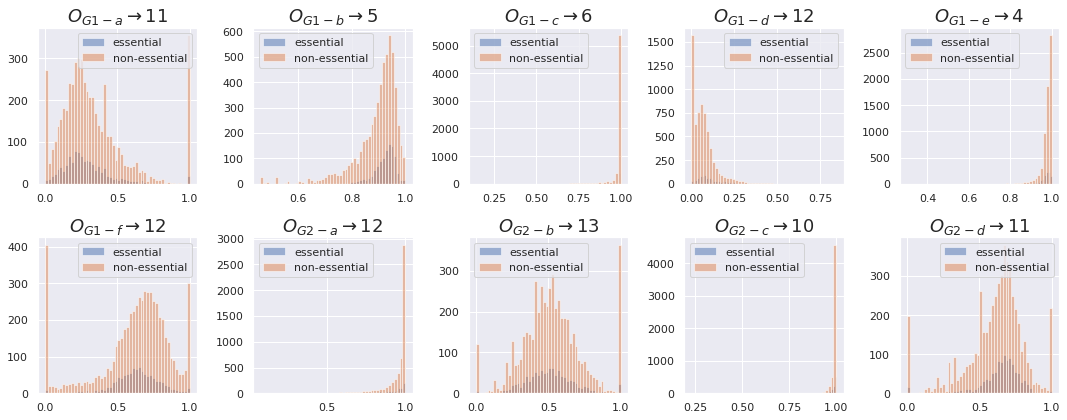

In [102]:
sample_size = 1000

fig, axes = plt.subplots(2,5,figsize=(15,6))
eq_set = 'O'

for nr,Eq in enumerate(GCV[eq_set].columns.get_level_values(0).unique()):
    
    orbit = GCV[eq_set][Eq].columns[0]
    gcv = GCV[eq_set][Eq][orbit].dropna()
    
    bars, pos, sth = axes.item(nr).hist(gcv[e_genes]    , bins=50, alpha=0.5, label='essential')
    bars, pos, sth = axes.item(nr).hist(gcv[set(PPI_nx)], bins=50, alpha=0.5, label='non-essential')
    
    axes.item(nr).set_title(orbit, fontsize=18)
    
    axes.item(nr).set_title(f"${eq_set}_{'{' + str(Eq) + '}'}$" + r'$\rightarrow$' + orbit, 
                            fontsize=18)
    axes.item(nr).legend()
    
plt.tight_layout()
plt.savefig(f'/home/clusterduck123/Desktop/plots/{eq_set}_coefficient_overview_1000.pdf')
plt.savefig(f'/home/clusterduck123/Desktop/plots/{eq_set}_coefficient_overview_1000.png')

## Variance analysis

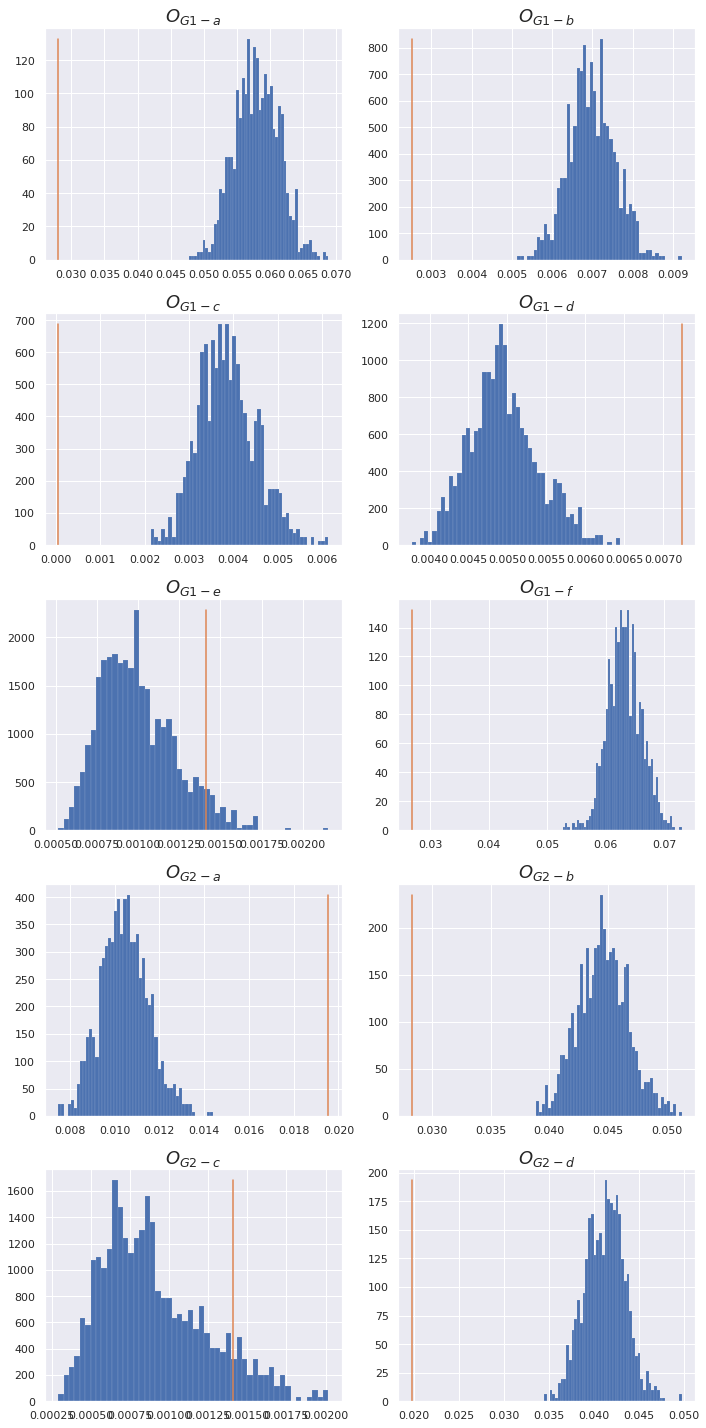

In [28]:
sample_size = 1000

fig, axes = plt.subplots(5,2,figsize=(10,20))
eq_set = 'O'

for nr,Eq in enumerate(GCV[eq_set].columns.get_level_values(0).unique()):
    
    var_list  = []

    for _ in range(sample_size):
        sample_genes = random.sample(PPI_nx.nodes, k)
        var_list.append(GCV.loc[sample_genes, (eq_set, Eq)].iloc[:,0].var())
        
    e_var  = GCV.loc[e_genes, (eq_set, Eq)].iloc[:,0].var()
        
    bars, pos, sth = axes.item(nr).hist(var_list, bins=50, density=True, linewidth=0.1)
    axes.item(nr).plot([e_var,e_var], [0,max(bars)]);
    axes.item(nr).set_title(f"${eq_set}_{'{' + str(Eq) + '}'}$", fontsize=18)
    
plt.tight_layout()
plt.savefig('/home/clusterduck123/Desktop/plots/O_coefficient_var_1000.pdf')
plt.savefig('/home/clusterduck123/Desktop/plots/O_coefficient_var_1000.png')

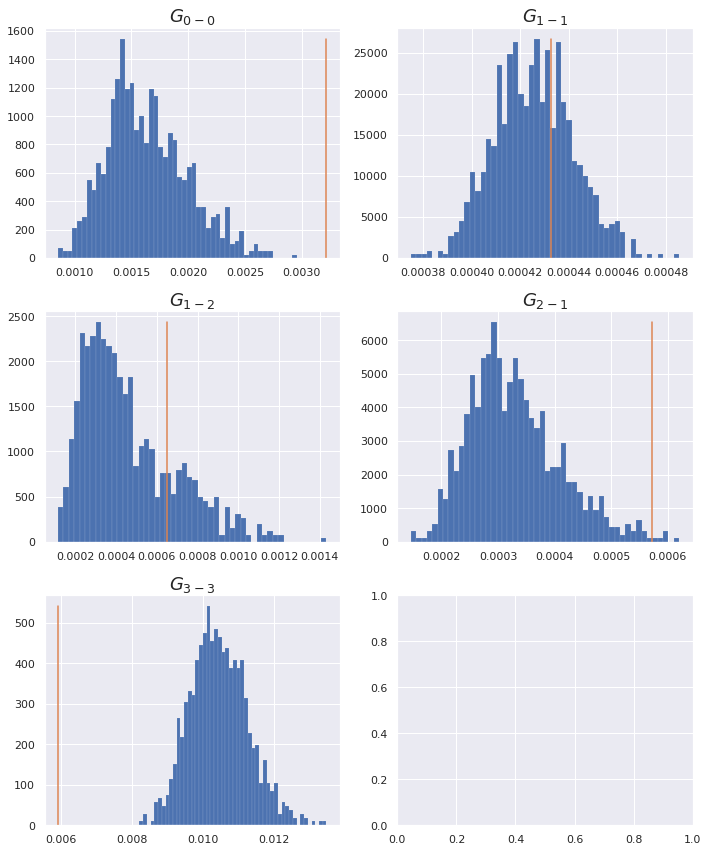

In [33]:
sample_size = 1000

fig, axes = plt.subplots(3,2,figsize=(10,12))
eq_set = 'G'

for nr,Eq in enumerate(GCV[eq_set].columns.get_level_values(0).unique()):
    
    var_list  = []

    for _ in range(sample_size):
        sample_genes = random.sample(PPI_nx.nodes, k)
        var_list.append(GCV.loc[sample_genes, (eq_set, Eq)].iloc[:,0].var())
        
    e_var  = GCV.loc[e_genes, (eq_set, Eq)].iloc[:,0].var()
        
    bars, pos, sth = axes.item(nr).hist(var_list, bins=50, density=True, linewidth=0.1)
    axes.item(nr).plot([e_var,e_var], [0,max(bars)]);
    axes.item(nr).set_title(f"${eq_set}_{'{' + str(Eq) + '}'}$", fontsize=18)
    
plt.tight_layout()
plt.savefig('/home/clusterduck123/Desktop/plots/O_coefficient_var_1000.pdf')
plt.savefig('/home/clusterduck123/Desktop/plots/O_coefficient_var_1000.png')

# Rank analysis

In [14]:
df = pd.DataFrame({
#               1 2 3 4 5 6 7 8 9 0 1 2 3 4
        'D0' : [0,2,2,0,0,0,0,0,0,0,0,0,0,0],
        'D1' : [0,0,0,0,1,0,0,2,0,1,0,2,0,0],
        'D2' : [0,0,0,0,0,0,3,0,0,0,2,0,1,0],
        'D3' : [0,0,0,0,0,0,0,0,0,0,1,0,2,3],
        
#               1 2 3 4 5 6 7 8 9 0 1 2 3 4
        'A0' : [1,0,2,0,0,0,0,0,0,0,0,0,0,0],
        'A1' : [0,0,0,1,0,0,0,2,0,1,0,0,2,0],
        'A2' : [0,0,0,0,0,1,0,0,0,1,0,0,1,0],
        'A3' : [0,0,0,0,0,0,0,0,1,0,0,2,0,3],
        
#                 1 2 3 4 5 6 7 8 9 0 1 2 3 4
        'C0-0' : [1,0,2,0,0,0,0,0,0,0,0,0,0,0],
        'C1-1' : [0,0,0,1,0,0,0,2,2,0,0,2,0,0],
        'C1-2' : [0,0,0,0,0,2,0,0,2,1,0,2,0,0],
        'C2-1' : [0,0,0,0,1,0,0,2,0,0,2,0,2,0],
        'C3-3' : [0,0,0,0,0,0,0,0,0,1,0,2,2,6],
    })

In [15]:
np.linalg.matrix_rank(df)

9

In [ ]:
sample_size = 1000

fig, axes = plt.subplots(2,2,figsize=(10,8))

for nr,Eq in enumerate(GCV['D'].columns.get_level_values(0).unique()):
    
    gcv = GCV['D'][Eq].dropna()
    
    all_genes = set(gcv.index)
    e_genes_p = e_genes                       & set(gcv.index)
    n_genes_p = (set(PPI_nx.nodes) - e_genes) & set(gcv.index)

    k = len(e_genes_p)
    
    assert len(all_genes) == len(e_genes_p) + len(n_genes_p)
    
    D = squareform(pdist(GCV['D'][Eq], 'cityblock'))
    D = pd.DataFrame(D, columns=PPI_nx.nodes, index=PPI_nx.nodes)
    
    mu_list  = []

    for _ in range(sample_size):
        sample_genes = random.sample(all_genes, k)
        sample_dists = squareform(D.loc[sample_genes,sample_genes])
        mu_list.append( np.mean(sample_dists))
        
    e_dists = squareform(D.loc[e_genes_p,e_genes_p])
    e_mu  = np.mean(e_dists)
        
    bars, pos, sth = axes.item(nr).hist(mu_list, bins=50, density=True, linewidth=0.1)
    axes.item(nr).plot([e_mu,e_mu], [0,max(bars)]);
    axes.item(nr).set_title(f"$D_{'{' + str(Eq) + '}'}$", fontsize=18)
    
plt.tight_layout()
plt.savefig('/home/clusterduck123/Desktop/plots/D_coefficient_overview_1000.pdf')
plt.savefig('/home/clusterduck123/Desktop/plots/D_coefficient_overview_1000.png')

In [ ]:
sample_size = 1000

fig, axes = plt.subplots(2,2,figsize=(10,8))

for nr,Eq in enumerate(GCV['D'].columns.get_level_values(0).unique()):
    
    gcv = GCV['D'][Eq].dropna()
    
    all_genes = set(gcv.index)
    e_genes_p = e_genes                       & set(gcv.index)
    n_genes_p = (set(PPI_nx.nodes) - e_genes) & set(gcv.index)

    k = len(e_genes_p)
    
    assert len(all_genes) == len(e_genes_p) + len(n_genes_p)
    
    D = squareform(pdist(GCV['D'][Eq], 'cityblock'))
    D = pd.DataFrame(D, columns=PPI_nx.nodes, index=PPI_nx.nodes)
    
    mu_list  = []

    for _ in range(sample_size):
        sample_genes = random.sample(all_genes, k)
        sample_dists = squareform(D.loc[sample_genes,sample_genes])
        mu_list.append( np.mean(sample_dists))
        
    e_dists = squareform(D.loc[e_genes_p,e_genes_p])
    e_mu  = np.mean(e_dists)
        
    bars, pos, sth = axes.item(nr).hist(mu_list, bins=50, density=True, linewidth=0.1)
    axes.item(nr).plot([e_mu,e_mu], [0,max(bars)]);
    axes.item(nr).set_title(f"$D_{'{' + str(Eq) + '}'}$", fontsize=18)
    
plt.tight_layout()
plt.savefig('/home/clusterduck123/Desktop/plots/D_coefficient_l1_1000.pdf')
plt.savefig('/home/clusterduck123/Desktop/plots/D_coefficient_l1_1000.png')

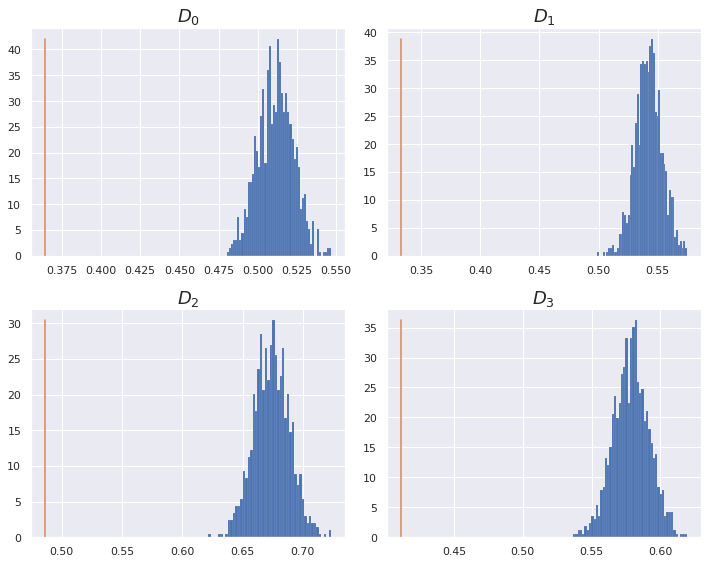

In [35]:
sample_size = 1000

fig, axes = plt.subplots(2,2,figsize=(10,8))

for nr,Eq in enumerate(GCV['D'].columns.get_level_values(0).unique()):
    
    gcv = GCV['D'][Eq].dropna()
    
    all_genes = set(gcv.index)
    e_genes_p = e_genes                       & set(gcv.index)
    n_genes_p = (set(PPI_nx.nodes) - e_genes) & set(gcv.index)

    k = len(e_genes_p)
    
    assert len(all_genes) == len(e_genes_p) + len(n_genes_p)
    
    D = squareform(pdist(GCV['D'][Eq], 'cityblock'))
    D = pd.DataFrame(D, columns=PPI_nx.nodes, index=PPI_nx.nodes)
    
    mu_list  = []

    for _ in range(sample_size):
        sample_genes = random.sample(all_genes, k)
        sample_dists = squareform(D.loc[sample_genes,sample_genes])
        mu_list.append( np.mean(sample_dists))
        
    e_dists = squareform(D.loc[e_genes_p,e_genes_p])
    e_mu  = np.mean(e_dists)
        
    bars, pos, sth = axes.item(nr).hist(mu_list, bins=50, density=True, linewidth=0.1)
    axes.item(nr).plot([e_mu,e_mu], [0,max(bars)]);
    axes.item(nr).set_title(f"$D_{'{' + str(Eq) + '}'}$", fontsize=18)
    
plt.tight_layout()
plt.savefig('/home/clusterduck123/Desktop/plots/D_coefficient_l1_1000.pdf')
plt.savefig('/home/clusterduck123/Desktop/plots/D_coefficient_l1_1000.png')

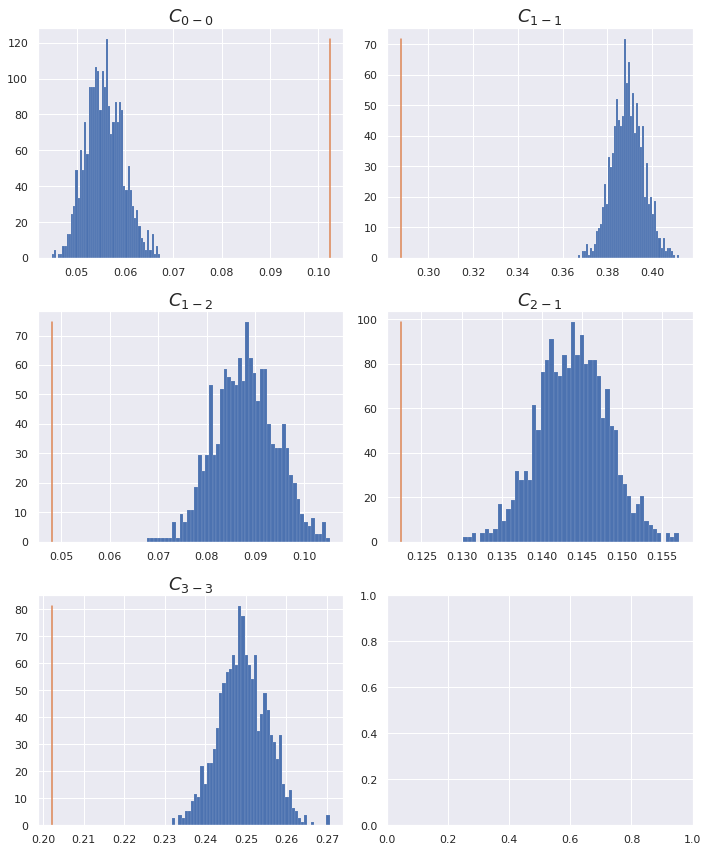

In [36]:
sample_size = 1000

fig, axes = plt.subplots(3,2,figsize=(10,12))

for nr,Eq in enumerate(GCV['G'].columns.get_level_values(0).unique()):
    
    gcv = GCV['G'][Eq].dropna()
    
    all_genes = set(gcv.index)
    e_genes_p = e_genes                       & set(gcv.index)
    n_genes_p = (set(PPI_nx.nodes) - e_genes) & set(gcv.index)

    k = len(e_genes_p)
    
    assert len(all_genes) == len(e_genes_p) + len(n_genes_p)
    
    D = squareform(pdist(GCV['G'][Eq], 'cityblock'))
    D = pd.DataFrame(D, columns=PPI_nx.nodes, index=PPI_nx.nodes)
    
    mu_list  = []

    for _ in range(sample_size):
        sample_genes = random.sample(all_genes, k)
        sample_dists = squareform(D.loc[sample_genes,sample_genes])
        mu_list.append( np.mean(sample_dists))
        
    e_dists = squareform(D.loc[e_genes_p,e_genes_p])
    e_mu  = np.mean(e_dists)
        
    bars, pos, sth = axes.item(nr).hist(mu_list, bins=50, density=True, linewidth=0.1)
    axes.item(nr).plot([e_mu,e_mu], [0,max(bars)]);
    axes.item(nr).set_title(f"$C_{'{' + str(Eq) + '}'}$", fontsize=18)
    
plt.tight_layout()
plt.savefig('/home/clusterduck123/Desktop/plots/C_coefficient_l1_1000.pdf')
plt.savefig('/home/clusterduck123/Desktop/plots/C_coefficient_l1_1000.png')

# Histograms

In [205]:
DEG_FILENAME = "degannotation-e.dat"
DEG_FILEPATH = f"{RAW_DATA_DIRECTORY}/{DEG_FILENAME}"

# load DEG dat-file as dataframe and extract yeast data (DEG2001)
DEG_df = pd.read_csv(f"{DEG_FILEPATH}", delimiter='\t', encoding='latin1').loc['DEG2001'].reset_index()

# load PPI with official symbol gene names
PPI_nx = nx.read_edgelist(f"{NETWORK_DIRECTORY}/PPI_BioGRID_official.txt")

e_genes = set(DEG_df.level_1) & set(PPI_nx)
n_genes = set(PPI_nx) - e_genes

In [222]:
GDV = graco.orbits(PPI_nx)
GCV = graco.coefficients(GDV)

In [223]:
D = graco.distance_matrix(GDV, 'GDV_similarity')
df = pd.DataFrame(D, index=PPI_nx.nodes, columns=PPI_nx)

In [224]:
d_int_e = squareform(df.loc[e_genes,e_genes])
d_int_n = squareform(df.loc[n_genes,n_genes])

In [209]:
d_ext = df.loc[e_genes,n_genes].values.flatten()

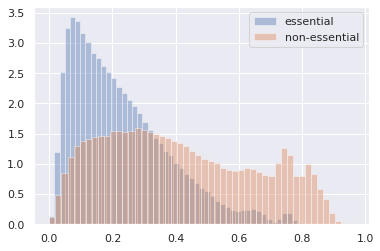

In [212]:
sns.distplot(d_int_e, kde=False, norm_hist=True, label='essential');
sns.distplot(d_int_n, kde=False, norm_hist=True, label='non-essential');
#sns.distplot(d_ext , kde=False, norm_hist=True, label='mix');
plt.legend();
plt.savefig('/home/clusterduck123/Desktop/lol3')

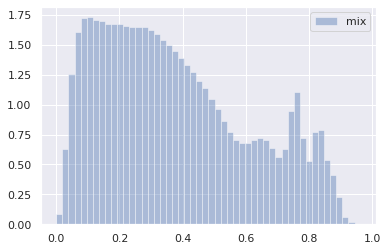

In [213]:
sns.distplot(d_ext , kde=False, norm_hist=True, label='mix');
plt.legend();
plt.savefig('/home/clusterduck123/Desktop/lol4')

In [214]:
D = graco.GCV_distance(GCV[['D','G']], 'canberra')
df = pd.DataFrame(D, index=PPI_nx.nodes, columns=PPI_nx)

In [215]:
d_int_e = squareform(df.loc[e_genes,e_genes])
d_int_n = squareform(df.loc[n_genes,n_genes])

In [216]:
d_ext = df.loc[e_genes,n_genes].values.flatten()

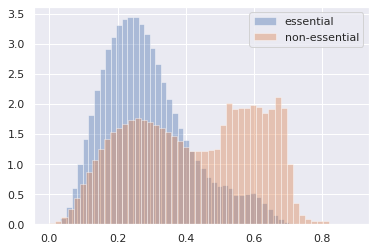

In [221]:
sns.distplot(d_int_e, kde=False, norm_hist=True, label='essential');
sns.distplot(d_int_n, kde=False, norm_hist=True, label='non-essential');
plt.legend()
plt.savefig('/home/clusterduck123/Desktop/lol3')

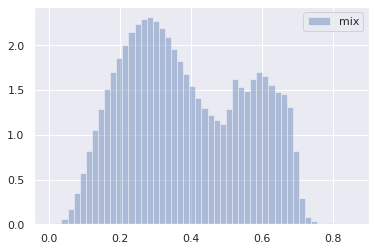

In [225]:
sns.distplot(d_ext , kde=False, norm_hist=True, label='mix');
plt.legend();
plt.savefig('/home/clusterduck123/Desktop/lol4')

In [156]:
sns.distplot(d_ext , kde=False, norm_hist=True, label='mix');
plt.legend();

,CDC73,CTR9,LEO1,PAF1,POB3,RTF1,SPT16,TAF10,RPO21,SRB5,CCR4,GAL11,HPR1,TFG2,SPT5,CKA1,STM1,SRP1,HSC82,PDB1,ATE1,NQM1,GCN5,BAT2,CKA2,...,SUP61,tI(UAU)L,21S_RRNA,tP(UGG)O3,TRR4,tL(GAG)G,tV(AAC)K1,tF(GAA)B,tI(UAU)D,EMT1,tV(AAC)H,snR58,TRN1,tC(GCA)P2,COL4A3BP,ADY2,MYOT,COX7A2,KCTD13,MAGEA4,DHPS,C14orf93,EFCAB14,HPM1,YFL051C
CDC73,0.000000,2.077212,4.974648,2.124478,1.085603,3.764063,5.434337,2.270177,6.159278,3.932434,16.763213,1.763884,3.462939,4.619531,7.142249,5.065510,4.756254,7.681331,12.137919,3.546710,12.146597,12.899449,8.059447,8.781970,3.602661,...,5.263248,5.263248,5.263248,5.263248,5.263248,5.263248,5.263248,5.263248,5.263248,5.263248,5.263248,5.263248,5.263248,5.263248,7.262150,6.107024,7.605550,7.581416,7.362165,6.974355,7.507106,7.262690,7.926341,7.262150,7.262150
CTR9,2.077212,0.000000,4.051395,1.067745,2.746288,3.625332,6.606539,3.868113,7.117169,5.552935,17.399715,2.791833,2.499136,4.676989,8.328883,6.296022,5.561876,8.441928,12.734390,2.026681,11.760365,12.645395,9.136185,8.090535,4.707720,...,5.266344,5.266344,5.266344,5.266344,5.266344,5.266344,5.266344,5.266344,5.266344,5.266344,5.266344,5.266344,5.266344,5.266344,7.296368,6.247496,7.652022,7.630175,7.408239,7.037318,7.552663,7.314025,7.972158,7.296368,7.296368
LEO1,4.974648,4.051395,0.000000,3.452233,5.241885,6.289750,9.535475,4.870365,10.153079,7.393500,18.493429,4.723955,5.622391,3.643288,10.855828,9.258174,8.440991,10.859586,14.879758,4.568134,13.694943,10.548472,11.571423,5.079409,8.028306,...,5.174968,5.174968,5.174968,5.174968,5.174968,5.174968,5.174968,5.174968,5.174968,5.174968,5.174968,5.174968,5.174968,5.174968,7.289545,6.228412,7.644463,7.623171,7.396800,7.004190,7.543876,7.301471,7.965642,7.289545,7.289545
PAF1,2.124478,1.067745,3.452233,0.000000,2.766705,3.950597,7.238603,3.352406,7.859814,5.276723,17.536277,2.442838,2.576781,3.951069,8.747746,6.872805,6.243684,8.862856,13.303612,2.750656,12.040044,12.196087,9.563450,7.361496,5.475986,...,5.225458,5.225458,5.225458,5.225458,5.225458,5.225458,5.225458,5.225458,5.225458,5.225458,5.225458,5.225458,5.225458,5.225458,7.276474,6.210590,7.631616,7.609631,7.386867,7.007397,7.532077,7.291648,7.951870,7.276474,7.276474
POB3,1.085603,2.746288,5.241885,2.766705,0.000000,4.523633,5.352370,1.754509,5.890647,3.541815,16.828670,1.689608,3.993315,4.616326,7.208480,5.049605,5.201903,7.796422,11.853177,4.258201,12.387157,12.863084,8.079498,8.911625,3.502041,...,5.314967,5.314967,5.314967,5.314967,5.314967,5.314967,5.314967,5.314967,5.314967,5.314967,5.314967,5.314967,5.314967,5.314967,7.265525,6.133763,7.611171,7.586990,7.370244,6.998754,7.513399,7.272202,7.931178,7.265525,7.265525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DHPS,7.507106,7.552663,7.543876,7.532077,7.513399,7.329313,7.466948,7.536004,7.554258,7.474626,7.658915,7.558492,7.450595,7.527417,7.399512,7.475780,7.494673,7.454938,7.566573,7.532722,7.479628,7.517187,7.488808,7.585753,7.530465,...,2.459656,2.459656,2.459656,2.459656,2.459656,2.459656,2.459656,2.459656,2.459656,2.459656,2.459656,2.459656,2.459656,2.459656,2.334248,2.181990,0.527490,0.710038,0.905415,1.492318,0.000000,0.876045,1.261076,2.334248,2.334248
C14orf93,7.262690,7.314025,7.301471,7.291648,7.272202,7.021389,7.208293,7.301223,7.308577,7.233327,7.696312,7.324468,7.208215,7.292246,7.113350,7.219534,7.238446,7.194225,7.293553,7.285229,7.243440,7.273608,7.225518,7.353521,7.282997,...,2.210669,2.210669,2.210669,2.210669,2.210669,2.210669,2.210669,2.210669,2.210669,2.210669,2.210669,2.210669,2.210669,2.210669,2.147747,1.818511,0.767144,0.893543,0.954778,1.374491,0.876045,0.000000,1.325367,2.147747,2.147747
EFCAB14,7.926341,7.972158,7.965642,7.951870,7.931178,7.771131,7.883999,7.951877,7.972026,7.887444,8.016955,7.976102,7.863006,7.944739,7.822501,7.894119,7.914383,7.874117,7.989655,7.953816,7.895738,7.940775,7.901896,8.005028,7.95

In [102]:
feature  = 'GCV-DG'
distance = 'normalized1_l1'

In [103]:
df = pd.read_csv(f"{MATRIX_DIRECTORY}/{feature}/{distance}_BioGRID.txt", delimiter=' ')

In [110]:
df.index = df.columns

In [104]:
GCV = GCV[['D','G']]

In [114]:
D_all   = pd.DataFrame(0, index=GCV.index, columns=GCV.index)
Divisor = pd.DataFrame(0, index=GCV.index, columns=GCV.index)

if True:
    if type(GCV.columns) == pd.MultiIndex:
        depth = len(GCV.columns.levels)

        for eq in set(GCV.columns.droplevel([depth-1])):

            length = len(GCV[eq].T)
            gcv = GCV[eq].dropna()
            not_nan_indices = gcv.index
            nan_indices = GCV.index[GCV[eq].isna().any(axis=1)]
            
            assert (GCV[eq].isna().any(axis=1) == GCV[eq].isna().all(axis=1)).all()
            assert len(nan_indices) + len(not_nan_indices) == len(GCV)
            
            D_i = graco.distance_matrix(gcv, distance)
            D_all.loc[  not_nan_indices,not_nan_indices] += D_i/length
            Divisor.loc[not_nan_indices,not_nan_indices] += 1
            
        df2 = D_all / Divisor
    else:
        raise Exception
else:
    raise Exception

In [121]:
np.testing.assert_allclose(df.values,df2.values,rtol=1e-04)

In [122]:
Divisor

,YLR418C,YOL145C,YOR123C,YBR279W,YML069W,YGL244W,YGL207W,YDR167W,YDL140C,YGR104C,YAL021C,YOL051W,YDR138W,YGR005C,YML010W,YIL035C,YLR150W,YNL189W,YMR186W,YBR221C,YGL017W,YGR043C,YGR252W,YJR148W,YOR061W,...,YJL062W,YNL130C,YNL320W,YNL336W,YNR061C,YOL092W,YOR067C,YJL077W-A,YDL159W-A,YMR170C,YNL067W-B,YGR204C-A,YLR157C,YPL223C,YJL077W-B,YAL067C,YMR158C-A,YJL077C,YNL146C-A,YGL188C-A,YFR018C,YBR056W-A,YOR278W,YCR010C,YBL029C-A
YLR418C,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,...,6,7,3,6,6,3,3,3,3,7,6,3,6,3,6,3,3,3,3,3,3,3,3,3,3
YOL145C,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,...,6,7,3,6,6,3,3,3,3,7,6,3,6,3,6,3,3,3,3,3,3,3,3,3,3
YOR123C,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,...,6,7,3,6,6,3,3,3,3,7,6,3,6,3,6,3,3,3,3,3,3,3,3,3,3
YBR279W,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,...,6,7,3,6,6,3,3,3,3,7,6,3,6,3,6,3,3,3,3,3,3,3,3,3,3
YML069W,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,...,6,7,3,6,6,3,3,3,3,7,6,3,6,3,6,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YFR018C,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
YBR056W-A,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
YOR278W,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
YCR010C,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [113]:
df2

,YLR418C,YOL145C,YOR123C,YBR279W,YML069W,YGL244W,YGL207W,YDR167W,YDL140C,YGR104C,YAL021C,YOL051W,YDR138W,YGR005C,YML010W,YIL035C,YLR150W,YNL189W,YMR186W,YBR221C,YGL017W,YGR043C,YGR252W,YJR148W,YOR061W,...,YJL062W,YNL130C,YNL320W,YNL336W,YNR061C,YOL092W,YOR067C,YJL077W-A,YDL159W-A,YMR170C,YNL067W-B,YGR204C-A,YLR157C,YPL223C,YJL077W-B,YAL067C,YMR158C-A,YJL077C,YNL146C-A,YGL188C-A,YFR018C,YBR056W-A,YOR278W,YCR010C,YBL029C-A
YLR418C,0.000000,0.231315,0.552833,0.236353,0.123095,0.420417,0.600190,0.252220,0.676416,0.425073,1.866186,0.192722,0.384639,0.513530,0.777519,0.563238,0.523598,0.797155,1.345814,0.393849,1.349843,1.432348,0.894349,0.975641,0.400618,...,2.015390,1.998719,1.793220,1.931298,1.995402,1.793220,1.793220,1.793220,2.315510,2.311219,2.044303,1.909810,1.994982,1.995933,2.117772,2.418170,1.848533,1.848533,1.848533,1.848533,1.848533,1.779230,1.779230,2.049363,2.010750
YOL145C,0.231315,0.000000,0.414576,0.083918,0.295074,0.425721,0.758891,0.411963,0.811288,0.605037,1.948998,0.281782,0.310205,0.501554,0.932795,0.729169,0.638512,0.918412,1.435804,0.248390,1.334632,1.386473,1.036835,0.868805,0.553810,...,1.998185,1.999380,1.777407,1.939005,1.991750,1.777407,1.777407,1.777407,2.341387,2.306826,2.063010,1.961180,2.030102,2.045463,2.112412,2.437823,1.824803,1.824803,1.824803,1.824803,1.824803,1.779870,1.779870,2.096520,2.058863
YOR123C,0.552833,0.414576,0.000000,0.383775,0.571816,0.701336,1.055894,0.541566,1.122403,0.814410,2.058271,0.511628,0.625309,0.405732,1.191276,1.028900,0.936152,1.174483,1.650783,0.508582,1.523720,1.171504,1.284812,0.563908,0.892415,...,1.981098,2.017836,1.747063,2.000535,1.973078,1.747063,1.747063,1.747063,2.334320,2.339309,2.053110,1.946277,2.103565,2.038020,2.153168,2.434120,1.795743,1.795743,1.795743,1.795743,1.795743,1.752283,1.752283,2.089310,2.046847
YBR279W,0.236353,0.083918,0.383775,0.000000,0.301944,0.442909,0.800198,0.372962,0.866481,0.576209,1.951980,0.259230,0.286312,0.439553,0.956691,0.763849,0.689969,0.942520,1.476287,0.306582,1.338403,1.353738,1.061522,0.817409,0.608685,...,1.990375,1.985396,1.763503,1.938080,1.978157,1.763503,1.763503,1.763503,2.331863,2.305483,2.052958,1.945180,2.028903,2.032433,2.110513,2.430110,1.814060,1.814060,1.814060,1.814060,1.814060,1.766147,1.766147,2.083943,2.044643
YML069W,0.123095,0.295074,0.571816,0.301944,0.000000,0.506542,0.600692,0.190729,0.655943,0.381997,1.880136,0.178804,0.446103,0.503519,0.790096,0.571252,0.578635,0.821509,1.323103,0.477243,1.381692,1.421822,0.904983,0.980193,0.399893,...,2.035178,2.013999,1.809980,1.922000,2.017038,1.809980,1.809980,1.809980,2.320890,2.331810,2.070387,1.923283,1.984298,2.004520,2.121765,2.420707,1.864347,1.864347,1.864347,1.864347,1.864347,1.795640,1.795640,2.057477,2.022357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YFR018C,1.848533,1.824803,1.795743,1.814060,1.864347,1.914807,1.929947,1.867773,1.919287,1.914230,2.253197,1.841860,1.897173,1.832293,1.905943,1.914983,1.880443,1.914673,2.097997,1.819690,1.831897,1.749817,1.987293,1.809157,1.876597,...,0.419831,0.433228,0.058945,0.406726,0.405193,0.058945,0.058945,0.058945,0.626499,1.168763,0.574223,0.210208,0.606105,0.326195,0.344929,0.745460,0.000000,0.000000,0.000000,0.000000,0.000000,0.086913,0.086913,0.378241,0.316724
YBR056W-A,1.779230,1.779870,1.752283,1.766147,1.795640,1.898087,1.849403,1.808623,1.871710,1.832793,2.294620,1.798140,1.815407,1.773863,1.893680,1.833563,1.810110,1.833553,2.025543,1.773997,1.750300,1.753030,1.909677,1.829997,1.819930,...,0.437890,0.346461,0.059199,0.377629,0.365779,0.059199,0.059199,0.059199,0.618713,1.154230,0.555919,0.197893,0.597180,0.305379,0.408846,0.731393,0.086913,0.086913,0.086913,0.086913,0.086913,0.000000,0.000000,0.358886,0.305563
YOR278W,1.779230,1.779870,1.752283,1.766147,1.795640,1.898087,1.849403,1.808623,1.871710,1.832793,2.294620,1.798140,1.815407,1.7738

In [108]:
df

,YLR418C,YOL145C,YOR123C,YBR279W,YML069W,YGL244W,YGL207W,YDR167W,YDL140C,YGR104C,YAL021C,YOL051W,YDR138W,YGR005C,YML010W,YIL035C,YLR150W,YNL189W,YMR186W,YBR221C,YGL017W,YGR043C,YGR252W,YJR148W,YOR061W,...,YJL062W,YNL130C,YNL320W,YNL336W,YNR061C,YOL092W,YOR067C,YJL077W-A,YDL159W-A,YMR170C,YNL067W-B,YGR204C-A,YLR157C,YPL223C,YJL077W-B,YAL067C,YMR158C-A,YJL077C,YNL146C-A,YGL188C-A,YFR018C,YBR056W-A,YOR278W,YCR010C,YBL029C-A
0,0.000000,0.065890,0.171607,0.068676,0.035239,0.113536,0.184121,0.075572,0.205868,0.117000,0.566456,0.055508,0.108341,0.154893,0.237481,0.174702,0.161037,0.249853,0.407493,0.110186,0.391147,0.415734,0.274702,0.287594,0.120364,...,0.595396,0.605173,0.534294,0.574373,0.590399,0.534294,0.534294,0.534294,0.664867,0.683298,0.602625,0.563442,0.590294,0.584973,0.620992,0.690532,0.548123,0.548123,0.548123,0.548123,0.548123,0.530797,0.530797,0.598330,0.588677
1,0.065890,0.000000,0.130478,0.023401,0.083147,0.113187,0.229665,0.121539,0.245426,0.169027,0.589738,0.081770,0.084123,0.148317,0.281812,0.222089,0.196254,0.286174,0.433456,0.068329,0.386504,0.402459,0.315188,0.256872,0.164807,...,0.590725,0.605000,0.529413,0.575930,0.589116,0.529413,0.529413,0.529413,0.670408,0.681862,0.606931,0.575357,0.598704,0.596427,0.619282,0.694518,0.541262,0.541262,0.541262,0.541262,0.541262,0.530029,0.530029,0.609192,0.599777
2,0.171607,0.130478,0.000000,0.120495,0.175515,0.208342,0.326448,0.160647,0.345208,0.239274,0.626827,0.154889,0.186788,0.112019,0.367358,0.319562,0.293227,0.368604,0.503284,0.157331,0.451760,0.328693,0.396845,0.160116,0.274124,...,0.592190,0.617467,0.521502,0.597049,0.590185,0.521502,0.521502,0.521502,0.668317,0.697835,0.610193,0.571306,0.622806,0.594242,0.635207,0.693267,0.533672,0.533672,0.533672,0.533672,0.533672,0.522807,0.522807,0.607064,0.596448
3,0.068676,0.023401,0.120495,0.000000,0.085553,0.119799,0.242110,0.110249,0.261295,0.161296,0.591253,0.075125,0.079779,0.131389,0.289757,0.232879,0.211258,0.293945,0.445043,0.084511,0.388931,0.392409,0.323201,0.241862,0.180812,...,0.589133,0.601966,0.525891,0.576060,0.586079,0.525891,0.525891,0.525891,0.667981,0.681987,0.604779,0.571310,0.598765,0.593123,0.619168,0.692543,0.538530,0.538530,0.538530,0.538530,0.538530,0.526552,0.526552,0.606001,0.596176
4,0.035239,0.083147,0.175515,0.085553,0.000000,0.138995,0.184995,0.057859,0.201440,0.106213,0.570384,0.052550,0.126878,0.152434,0.241263,0.177458,0.175439,0.256276,0.402560,0.133849,0.400384,0.412296,0.278057,0.287368,0.120846,...,0.600675,0.609063,0.538707,0.572381,0.596140,0.538707,0.538707,0.538707,0.666434,0.688516,0.609478,0.567032,0.587955,0.587342,0.622322,0.691388,0.552298,0.552298,0.552298,0.552298,0.552298,0.535122,0.535122,0.600581,0.591801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5721,0.548123,0.541262,0.533672,0.538530,0.552298,0.563993,0.571086,0.553312,0.568521,0.565843,0.680012,0.546261,0.559212,0.543288,0.566004,0.567269,0.556921,0.566613,0.626093,0.539842,0.541437,0.520945,0.588791,0.535998,0.556672,...,0.104958,0.108307,0.014736,0.101682,0.101298,0.014736,0.014736,0.014736,0.156625,0.292191,0.143556,0.052552,0.151526,0.081549,0.086232,0.186365,0.000000,0.000000,0.000000,0.000000,0.000000,0.021728,0.021728,0.094560,0.079181
5722,0.530797,0.530029,0.522807,0.526552,0.535122,0.559813,0.550950,0.538524,0.556627,0.545484,0.690368,0.535331,0.538770,0.528681,0.562938,0.546914,0.539338,0.546333,0.607980,0.528418,0.521038,0.521748,0.569387,0.541208,0.542505,...,0.109472,0.086615,0.014800,0.094407,0.091445,0.014800,0.014800,0.014800,0.154678,0.288557,0.138980,0.049473,0.149295,0.076345,0.102211,0.182848,0.021728,0.021728,0.021728,0.021728,0.021728,0.000000,0.000000,0.089722,0.076391
5723,0.530797,0.530029,0.522807,0.526552,0.535122,0.559813,0.550950,0.538524,0.556627,0.545484,0.690368,0.535331,0.538770,0.528681,0.562938,0.546914,0.539338,0.546333,0.

In [57]:
len(not_nan_indices) + len(nan_indices), len(GCV.index)

(11874, 6502)

In [63]:
gcv = GCV[eq].dropna()

In [75]:
nan_indices = GCV.index[GCV[eq].isna().any(axis=1)]
len(nan_indices) + len(not_nan_indices) = len(GCV)

In [77]:
len(nan_indices) + len(not_nan_indices) = len(GCV)

(6502, 6502)

In [59]:
nan_indices

Index(['CDC73', 'CTR9', 'LEO1', 'PAF1', 'POB3', 'RTF1', 'SPT16', 'TAF10',
       'RPO21', 'SRB5',
       ...
       'KPNA3', 'SGTB', 'CAGE1', 'YWHAE', 'TFG', 'ALD2', 'YNL067W-B', 'ASP3-2',
       'YJL077W-B', 'HSPA9'],
      dtype='object', length=5937)

In [54]:
(GCV[eq].isna().any(axis=1) == GCV[eq].isna().all(axis=1)).all()

True

In [27]:
D.isna().any().any()

False

In [18]:
GCV.index[~GCV[eq].isna().any(axis=1)]

Index(['CDC73', 'CTR9', 'LEO1', 'PAF1', 'POB3', 'RTF1', 'SPT16', 'TAF10',
       'RPO21', 'SRB5',
       ...
       'KPNA3', 'SGTB', 'CAGE1', 'YWHAE', 'TFG', 'ALD2', 'YNL067W-B', 'ASP3-2',
       'YJL077W-B', 'HSPA9'],
      dtype='object', length=5937)

In [8]:
D = graco.distance_matrix(GCV,'normalized1_l1')
df = pd.DataFrame(D, index=GCV.index, columns=GCV.index)

In [10]:
GCV

Order            A                                                    \
Source         0-0                 1-2                           2-1   
Target           1         3        10        13         6        10   
CDC73     0.938482  0.061518  0.037221  0.000505  0.962274  0.394467   
CTR9      0.959522  0.040478  0.028290  0.000286  0.971424  0.411264   
LEO1      0.967036  0.032964  0.020692  0.000158  0.979150  0.325474   
PAF1      0.960568  0.039432  0.025202  0.000241  0.974556  0.364204   
POB3      0.933203  0.066797  0.040512  0.000605  0.958883  0.437039   
...            ...       ...       ...       ...       ...       ...   
DHPS      1.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
C14orf93  1.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
EFCAB14   1.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
HPM1      1.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
YFL051C   1.000000  0.000000  0.000000  0.000000  1.000000  0.000000   

Order                                                                 \
Source                                       3-3                       
Target          13         4         8        12        14         9   
CDC73     0.005350  0.564655  0.015089  0.135717  0.010324  0.697593   
CTR9      0.004160  0.543915  0.018251  0.142098  0.005301  0.699900   
LEO1      0.002490  0.639626  0.014960  0.128754  0.004261  0.729711   
PAF1      0.003489  0.597401  0.015709  0.119796  0.004776  0.746080   
POB3      0.006527  0.525113  0.012397  0.145415  0.013113  0.669832   
...            ...       ...       ...       ...       ...       ...   
DHPS      0.000000  1.000000  0.000000  0.000000  0.000000  1.000000   
C14orf93  0.000000  1.000000  0.000000  0.000000  0.000000  1.000000   
EFCAB14   0.000000  1.000000  0.000000  0.000000  0.000000  1.000000   
HPM1      0.000000  1.000000  0.000000       NaN       NaN       NaN   
YFL051C   0.000000  1.000000  0.000000       NaN       NaN       NaN   

Order            D                                                    \
Source           0                   1                                 
Target           2         3        10        12         5         8   
CDC73     0.716298  0.283702  0.447790  0.051336  0.466618  0.034256   
CTR9      0.731359  0.268641  0.409993  0.058968  0.494650  0.036389   
LEO1      0.527738  0.472262  0.487076  0.094591  0.373558  0.044774   
PAF1      0.699565  0.300435  0.439588  0.059071  0.463421  0.037920   
POB3      0.714550  0.285450  0.485142  0.051830  0.435504  0.027523   
...            ...       ...       ...       ...       ...       ...   
DHPS           NaN       NaN       NaN       NaN       NaN       NaN   
C14orf93       NaN       NaN       NaN       NaN       NaN       NaN   
EFCAB14        NaN       NaN       NaN       NaN       NaN       NaN   
HPM1           NaN       NaN       NaN       NaN       NaN       NaN   
YFL051C        NaN       NaN       NaN       NaN       NaN       NaN   

Order                                                                 \
Source           2                             3                       
Target          11        13         7        11        13        14   
CDC73     0.350676  0.074459  0.574866  0.442697  0.375989  0.181314   
CTR9      0.324126  0.073415  0.602458  0.441207  0.399738  0.159055   
LEO1      0.478586  0.201108  0.320305  0.267403  0.449465  0.283133   
PAF1      0.348832  0.089842  0.561325  0.406129  0.418395  0.175476   
POB3      0.312277  0.082002  0.605721  0.390852  0.410542  0.198606   
...            ...       ...       ...       ...       ...       ...   
DHPS           NaN       NaN       NaN       NaN       NaN       NaN   
C14orf93       NaN       NaN       NaN       NaN       NaN       NaN   
EFCAB14        NaN       NaN       NaN       NaN       NaN       NaN   
HPM1           NaN       NaN       NaN       NaN       NaN       NaN   
YFL051C        NaN       NaN       Na

In [9]:
df

,CDC73,CTR9,LEO1,PAF1,POB3,RTF1,SPT16,TAF10,RPO21,SRB5,CCR4,GAL11,HPR1,TFG2,SPT5,CKA1,STM1,SRP1,HSC82,PDB1,ATE1,NQM1,GCN5,BAT2,CKA2,...,SUP61,tI(UAU)L,21S_RRNA,tP(UGG)O3,TRR4,tL(GAG)G,tV(AAC)K1,tF(GAA)B,tI(UAU)D,EMT1,tV(AAC)H,snR58,TRN1,tC(GCA)P2,COL4A3BP,ADY2,MYOT,COX7A2,KCTD13,MAGEA4,DHPS,C14orf93,EFCAB14,HPM1,YFL051C
CDC73,0.00000,3.31795,7.10030,3.66895,1.72219,6.25833,8.32119,3.07238,9.80653,5.42627,24.3179,2.44906,5.87240,7.07141,10.04350,7.69656,6.91242,10.11700,18.1721,5.15384,19.5909,20.3182,12.2273,13.75350,6.13778,...,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,NaN,NaN,NaN,NaN,NaN
CTR9,3.31795,0.00000,5.33066,1.66477,4.46583,6.03972,10.09650,5.49072,11.34110,7.94757,25.0833,4.04435,4.03206,6.76744,11.89430,9.56604,8.49739,11.56130,18.8915,2.84627,19.1742,19.9720,13.7024,12.83920,7.95241,...,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,NaN,NaN,NaN,NaN,NaN
LEO1,7.10030,5.33066,0.00000,4.23936,7.91744,8.55050,13.86900,7.39021,15.16480,10.30390,26.3270,6.89287,6.48306,4.93002,14.87390,13.39930,12.34730,14.86680,21.5171,6.17754,20.7586,17.5440,16.8135,9.05949,12.19060,...,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,NaN,NaN,NaN,NaN,NaN
PAF1,3.66895,1.66477,4.23936,0.00000,4.90242,6.11816,11.19240,5.29456,12.52190,7.65582,25.3727,3.99783,3.52551,5.60577,12.56520,10.61790,9.68177,12.46380,19.7852,3.75842,19.2591,19.3221,14.5321,11.70240,9.20831,...,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,NaN,NaN,NaN,NaN,NaN
POB3,1.72219,4.46583,7.91744,4.90242,0.00000,7.37399,7.88568,2.39916,9.18862,5.16899,24.3334,2.44169,6.77147,7.44873,9.91892,7.30390,6.99345,9.88396,17.7339,6.34737,19.8766,20.4040,11.9570,14.04370,5.64151,...,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DHPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
C14orf93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
EFCAB14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
HPM1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [79]:
d_int_e = squareform(df.loc[e_genes,e_genes])
d_int_n = squareform(df.loc[n_genes,n_genes], checks=False)
d_ext = df.loc[e_genes,n_genes].values.flatten()

/home/clusterduck123/Desktop/git/supplements/venv/graco/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/clusterduck123/Desktop/git/supplements/venv/graco/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


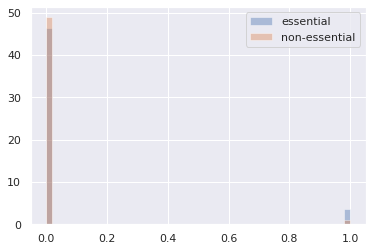

In [80]:
sns.distplot(d_int_e, kde=False, norm_hist=True, label='essential');
sns.distplot(d_int_n, kde=False, norm_hist=True, label='non-essential');
#sns.distplot(d_ext , kde=False, norm_hist=True, label='mix');
plt.legend();

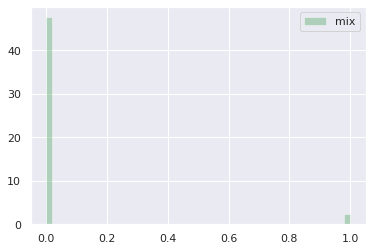

In [81]:
sns.distplot(d_ext , kde=False, norm_hist=True, label='mix', color='g');
plt.legend();

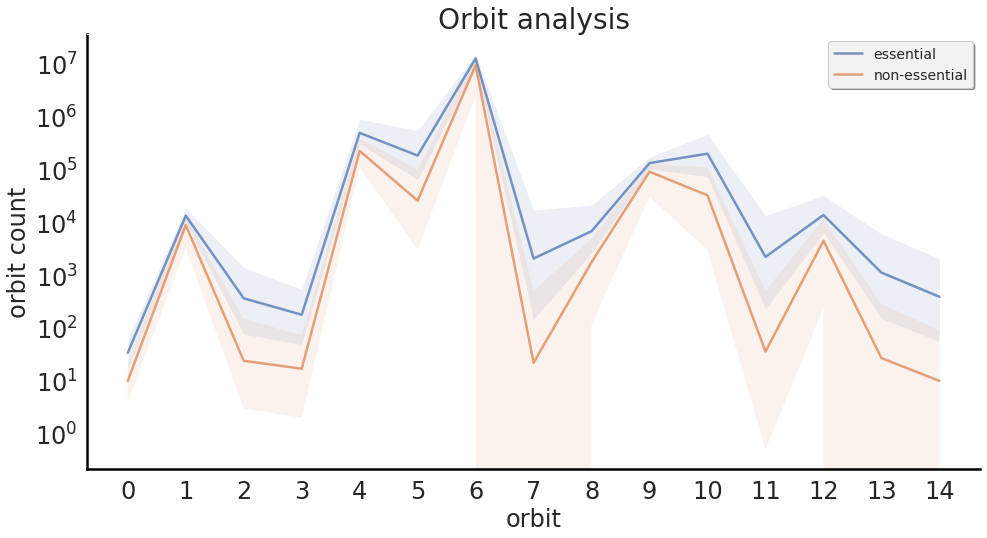

In [226]:
fig, ax = plt.subplots(figsize=(16,8))

ax.semilogy(e_GDV.columns, e_GDV.median(), 
                    label     = 'essential',
                    linewidth = 2.5,
                    alpha     = 0.75);
ax.fill_between(e_GDV.columns, e_GDV.quantile(0.25), e_GDV.quantile(0.75), 
                alpha=0.1,);

ax.semilogy(n_GDV.columns, n_GDV.median(), 
                    label     = 'non-essential',
                    linewidth = 2.5,
                    alpha     = 0.75);

ax.fill_between(n_GDV.columns, n_GDV.quantile(0.25), n_GDV.quantile(0.75), 
                alpha=0.1,);

ax.set_title(f'Orbit analysis', fontsize=28)

ax.patch.set_alpha(0)

ax.set_xlabel(f'orbit', fontsize=24)
ax.set_ylabel('orbit count', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=24)

ax.spines['left'].set_linewidth(2.5)
ax.spines['left'].set_color('black')

ax.spines['bottom'].set_linewidth(2.5)
ax.spines['bottom'].set_color('black')

ax.set_xticks(n_GDV.columns)

ax.legend(fontsize=14, shadow=True, facecolor=[0.95, 0.95, 0.95, 0]);
plt.savefig('/home/clusterduck123/Desktop/lol2.png')

In [229]:
test = GCV['D']['0'].dropna()
test['type'] = 'N'
test.loc[test.index.isin(e_genes), 'type'] = 'E'

e_test = e_GCV['D']['0']
n_test = n_GCV['D']['0']

In [254]:
GCV

Order            A                                                    \
Source         0-0                 1-2                           2-1   
Target           1         3        10        13         6        10   
CDC73     0.938482  0.061518  0.037221  0.000505  0.962274  0.394467   
CTR9      0.959522  0.040478  0.028290  0.000286  0.971424  0.411264   
LEO1      0.967036  0.032964  0.020692  0.000158  0.979150  0.325474   
PAF1      0.960568  0.039432  0.025202  0.000241  0.974556  0.364204   
POB3      0.933203  0.066797  0.040512  0.000605  0.958883  0.437039   
...            ...       ...       ...       ...       ...       ...   
DHPS      1.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
C14orf93  1.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
EFCAB14   1.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
HPM1      1.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
YFL051C   1.000000  0.000000  0.000000  0.000000  1.000000  0.000000   

Order                                                                 \
Source                                       3-3                       
Target          13         4         8        12        14         9   
CDC73     0.005350  0.564655  0.015089  0.135717  0.010324  0.697593   
CTR9      0.004160  0.543915  0.018251  0.142098  0.005301  0.699900   
LEO1      0.002490  0.639626  0.014960  0.128754  0.004261  0.729711   
PAF1      0.003489  0.597401  0.015709  0.119796  0.004776  0.746080   
POB3      0.006527  0.525113  0.012397  0.145415  0.013113  0.669832   
...            ...       ...       ...       ...       ...       ...   
DHPS      0.000000  1.000000  0.000000  0.000000  0.000000  1.000000   
C14orf93  0.000000  1.000000  0.000000  0.000000  0.000000  1.000000   
EFCAB14   0.000000  1.000000  0.000000  0.000000  0.000000  1.000000   
HPM1      0.000000  1.000000  0.000000       NaN       NaN       NaN   
YFL051C   0.000000  1.000000  0.000000       NaN       NaN       NaN   

Order            D                                                    \
Source           0                   1                                 
Target           2         3        10        12         5         8   
CDC73     0.716298  0.283702  0.447790  0.051336  0.466618  0.034256   
CTR9      0.731359  0.268641  0.409993  0.058968  0.494650  0.036389   
LEO1      0.527738  0.472262  0.487076  0.094591  0.373558  0.044774   
PAF1      0.699565  0.300435  0.439588  0.059071  0.463421  0.037920   
POB3      0.714550  0.285450  0.485142  0.051830  0.435504  0.027523   
...            ...       ...       ...       ...       ...       ...   
DHPS           NaN       NaN       NaN       NaN       NaN       NaN   
C14orf93       NaN       NaN       NaN       NaN       NaN       NaN   
EFCAB14        NaN       NaN       NaN       NaN       NaN       NaN   
HPM1           NaN       NaN       NaN       NaN       NaN       NaN   
YFL051C        NaN       NaN       NaN       NaN       NaN       NaN   

Order                                                                 \
Source           2                             3                       
Target          11        13         7        11        13        14   
CDC73     0.350676  0.074459  0.574866  0.442697  0.375989  0.181314   
CTR9      0.324126  0.073415  0.602458  0.441207  0.399738  0.159055   
LEO1      0.478586  0.201108  0.320305  0.267403  0.449465  0.283133   
PAF1      0.348832  0.089842  0.561325  0.406129  0.418395  0.175476   
POB3      0.312277  0.082002  0.605721  0.390852  0.410542  0.198606   
...            ...       ...       ...       ...       ...       ...   
DHPS           NaN       NaN       NaN       NaN       NaN       NaN   
C14orf93       NaN       NaN       NaN       NaN       NaN       NaN   
EFCAB14        NaN       NaN       NaN       NaN       NaN       NaN   
HPM1           NaN       NaN       NaN       NaN       NaN       NaN   
YFL051C        NaN       NaN       Na

In [255]:
translator = {
    0 : '1-1',
    1 : '1-2',
    2 : '2-1',
    3 : '3-3'
}

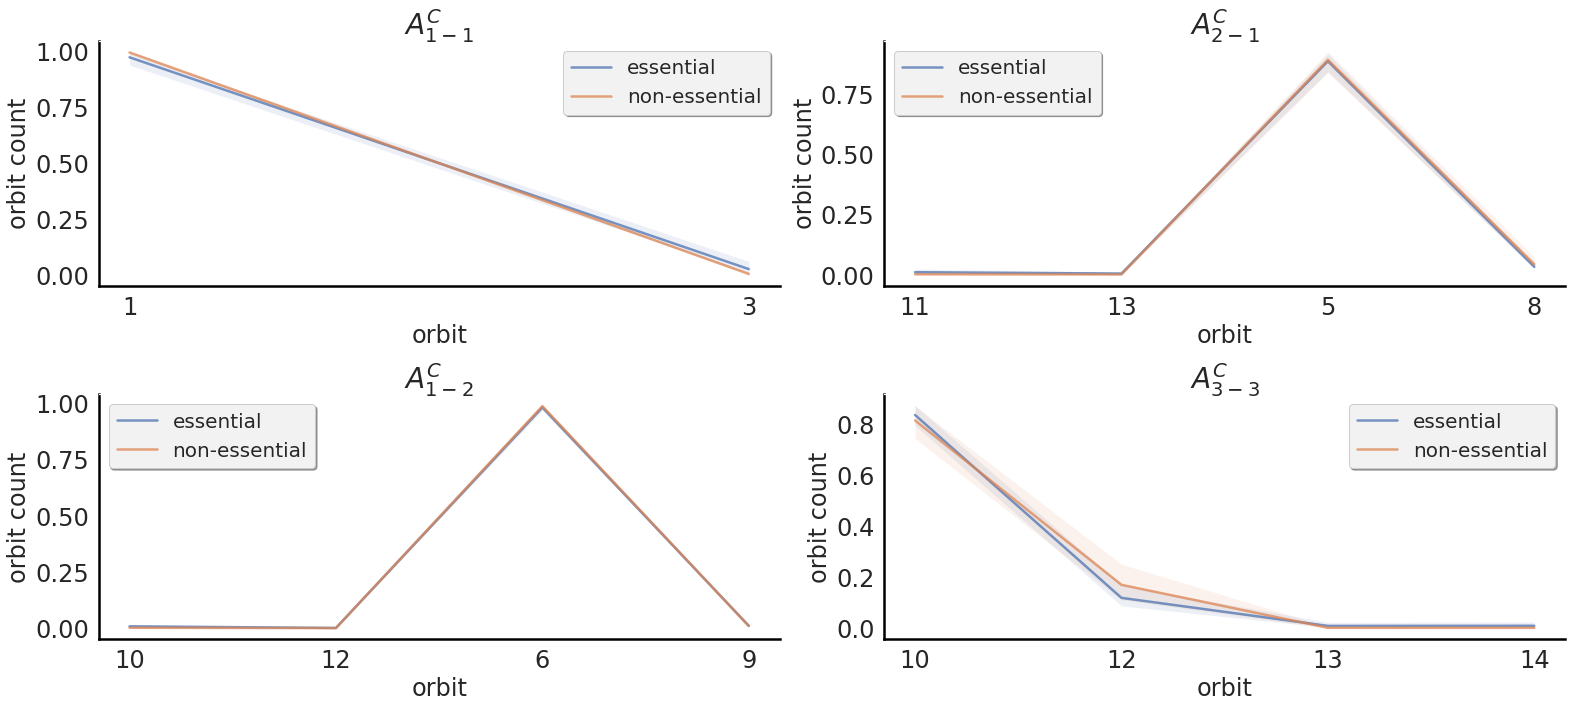

In [262]:
fig, axes = plt.subplots(2,2,figsize=(22,10))

for nr, ax in enumerate(axes.flatten()):
    
    e_test = e_GCV['G'][translator[nr]]
    n_test = n_GCV['G'][translator[nr]]

    ax.plot(e_test.columns, e_test.median(), 
                        label     = 'essential',
                        linewidth = 2.5,
                        alpha     = 0.75);
    ax.fill_between(e_test.columns, e_test.quantile(0.25), e_test.quantile(0.75), 
                    alpha=0.1,);

    ax.plot(n_test.columns, n_test.median(), 
                        label     = 'non-essential',
                        linewidth = 2.5,
                        alpha     = 0.75);

    ax.fill_between(n_test.columns, n_test.quantile(0.25), n_test.quantile(0.75), 
                    alpha=0.1,);
    if nr == 0:
        ax.set_title('$A^C_{1-1}$', fontsize=28)
    if nr == 2:
        ax.set_title('$A^C_{1-2}$', fontsize=28)
    if nr == 1:
        ax.set_title('$A^C_{2-1}$', fontsize=28)
    if nr == 3:
        ax.set_title('$A^C_{3-3}$', fontsize=28)

    ax.patch.set_alpha(0)

    ax.set_xlabel(f'orbit', fontsize=24)
    ax.set_ylabel('orbit count', fontsize=24)
    ax.tick_params(axis='both', which='major', labelsize=24)

    ax.spines['left'].set_linewidth(2.5)
    ax.spines['left'].set_color('black')

    ax.spines['bottom'].set_linewidth(2.5)
    ax.spines['bottom'].set_color('black')

    ax.set_xticks(n_test.columns)

    ax.legend(fontsize=20, shadow=True, facecolor=[0.95, 0.95, 0.95, 0]);

plt.tight_layout()
plt.savefig('/home/clusterduck123/Desktop/lol.png')

In [170]:
test = GCV['D']['0'].dropna().reset_index()
test = pd.melt(test, id_vars='index').set_index('index')
test['type'] = 'non-essential'
test.loc[test.index.isin(e_genes), 'type'] = 'essential'

In [171]:
test

,Target,value,type
index,,,
CDC73,2,0.716298,non-essential
CTR9,2,0.731359,non-essential
LEO1,2,0.527738,non-essential
PAF1,2,0.699565,non-essential
POB3,2,0.714550,essential
...,...,...,...
ALD2,3,0.000000,non-essential
YNL067W-B,3,0.000000,non-essential
ASP3-2,3,0.000000,non-essential


In [172]:
GCV.G.columns

MultiIndex([('0-0',  '1'),
            ('0-0',  '3'),
            ('1-1', '12'),
            ('1-1',  '4'),
            ('1-1',  '8'),
            ('1-1',  '9'),
            ('1-2', '10'),
            ('1-2', '12'),
            ('1-2',  '6'),
            ('1-2',  '9'),
            ('2-1', '11'),
            ('2-1', '13'),
            ('2-1',  '5'),
            ('2-1',  '8'),
            ('3-3', '10'),
            ('3-3', '12'),
            ('3-3', '13'),
            ('3-3', '14')],
           names=['Source', 'Target'])

In [202]:
features = GCV['A']['3-3']

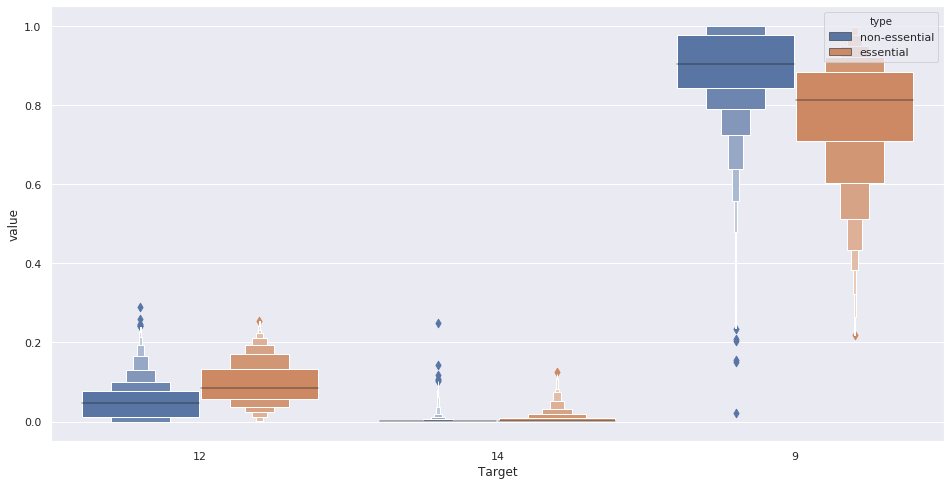

In [204]:
test = features.dropna().reset_index()
test = pd.melt(test, id_vars='index').set_index('index')
test['type'] = 'non-essential'
test.loc[test.index.isin(e_genes), 'type'] = 'essential'

fig, ax = plt.subplots(figsize=(16,8))
sns.boxenplot(data=test, x='Target', y='value', hue='type', ax=ax);
plt.savefig('/home/clusterduck123/Desktop/lol2.png')

In [8]:
g = sns.factorplot("class", "survived", "sex",
                   data=titanic, kind="bar",
                   size=6, palette="muted", legend=False)
g.fig.get_axes()[0].set_yscale('log')

NameError: name 'titanic' is not defined

TypeError: ('D', '0', '2') is not a string

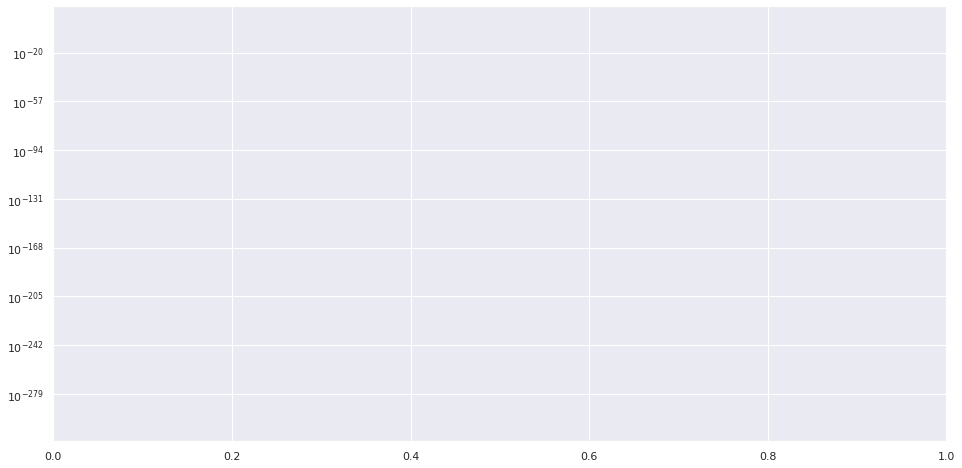

In [37]:
fig, ax = plt.subplots(figsize=(16,8))

ax.semilogy(e_GCV.columns, e_GCV.median(), 
                    label     = 'essential',
                    linewidth = 2.5,
                    alpha     = 0.75);
ax.fill_between(e_GCV.columns, e_GCV.quantile(0.25), e_GCV.quantile(0.75), 
                alpha=0.1,);

ax.semilogy(n_GCV.columns, n_GCV.median(), 
                    label     = 'non-essential',
                    linewidth = 2.5,
                    alpha     = 0.75);

ax.fill_between(n_GCV.columns, n_GCV.quantile(0.25), n_GCV.quantile(0.75), 
                alpha=0.1,);

ax.set_title(f'Orbit analysis', fontsize=28)

ax.patch.set_alpha(0)

ax.set_xlabel(f'orbit', fontsize=24)
ax.set_ylabel('orbit count', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=24)

ax.spines['left'].set_linewidth(2.5)
ax.spines['left'].set_color('black')

ax.spines['bottom'].set_linewidth(2.5)
ax.spines['bottom'].set_color('black')

ax.set_xticks(n_GCV.columns)

ax.legend(fontsize=14, shadow=True, facecolor=[0.95, 0.95, 0.95, 0]);

In [12]:
all_dict = nx.eigenvector_centrality(PPI_nx)

In [21]:
n_dict = dict(item for item in all_dict.items() if item[0] in n_genes)
e_dict = dict(item for item in all_dict.items() if item[0] in e_genes)

In [22]:
np.mean(list(n_dict.values())), np.mean(list(e_dict.values()))

(0.0063059643477431865, 0.012758112870667327)

In [88]:
df = GDV.T.melt()
df['type'] = 'N'
df.loc[df.variable.isin(e_genes), 'type'] = 'E'

In [1]:
GDV

NameError: name 'GDV' is not defined

/home/clusterduck123/Desktop/git/supplements/venv/graco/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/clusterduck123/Desktop/git/supplements/venv/graco/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

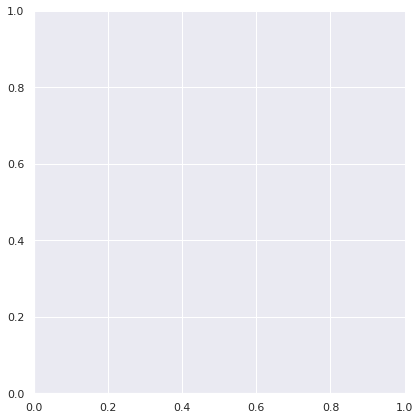

In [92]:
g = sns.factorplot("variable", "value", "type",
                   data=df, kind="bar",
                   size=6, palette="muted", legend=False)
g.fig.get_axes()[0].set_yscale('log')